## Regression Using ANN

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

2023-07-31 08:46:21.045574: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 08:46:21.083270: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 08:46:21.084107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 08:46:21.611154: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = fetch_california_housing()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
dataset.data.shape

(20640, 8)

In [5]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
dataset.target_names

['MedHouseVal']

In [7]:
independent_features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
independent_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
independent_features.shape

(20640, 8)

In [9]:
dependent_features = pd.DataFrame(dataset.target, columns=dataset.target_names)
dependent_features

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [10]:
dependent_features.shape

(20640, 1)

In [11]:
dependent_features

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [12]:
# Feature Selection

In [13]:
df = independent_features.copy()
df['MedHouseVal'] = dependent_features
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


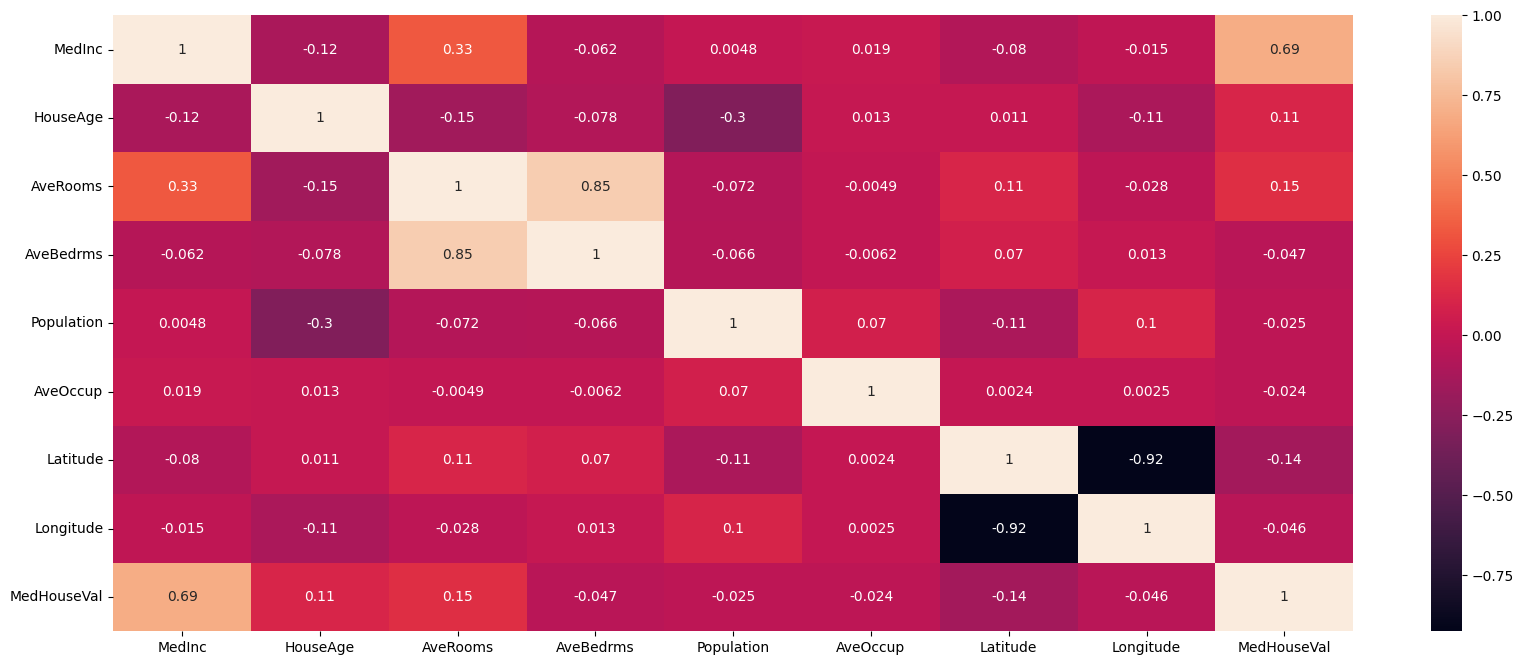

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
independent_features.drop(['Latitude','Longitude'], axis=1, inplace=True)

In [17]:
independent_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [18]:
# Split the Data into Train, Test and Validation Dataset
X_train, X_test, y_train, y_test = train_test_split(independent_features, dependent_features, test_size=0.20, random_state=42, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42, shuffle=True)

In [19]:
X_train.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
16490,4.7069,27.0,6.523256,1.116279,873.0,3.383721
6090,3.8750,15.0,5.058406,1.075770,3359.0,2.651144
10973,2.8828,26.0,5.290618,1.201373,1273.0,2.913043


In [20]:
X_test.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332


In [21]:
X_valid.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
2071,3.5375,35.0,6.543956,1.043956,537.0,2.950549
2612,2.1726,23.0,4.287179,0.987179,1060.0,2.717949
10838,4.2071,14.0,3.916929,1.056639,3148.0,1.981120


In [22]:
# Scaling the Train, Test and Validation Dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [23]:
X_train

array([[ 0.44340968, -0.12449485,  0.5204714 ,  0.05758629, -0.48710064,
         0.05165771],
       [ 0.00321001, -1.07770852, -0.17083875, -0.04872181,  1.69902706,
        -0.05515937],
       [-0.52181236, -0.20392932, -0.06125032,  0.28089603, -0.13535041,
        -0.01697183],
       ...,
       [ 0.061099  , -0.8394051 ,  0.06108211, -0.20832847,  0.46174561,
         0.0310699 ],
       [ 0.33985508, -0.99827405, -0.47481979, -0.2175701 , -0.61285135,
        -0.13760481],
       [ 0.17518368,  0.51098093, -0.49473189, -0.46726841, -0.69199516,
        -0.00768362]])

In [24]:
X_test

array([[-1.15763869, -0.28336379, -0.57962896, -0.18908216, -0.03070471,
         0.12364657],
       [-0.70780849,  0.11380857, -0.17981591,  0.26021715,  0.12142726,
        -0.05098189],
       [-0.20575122,  1.86136697, -0.68111604,  0.24023151, -0.10281351,
        -0.24337286],
       ...,
       [ 2.83670105, -0.28336379,  0.85762941, -0.38616779,  0.13901477,
        -0.03484094],
       [-0.5735632 ,  0.59041541, -0.0619999 , -0.29185333, -0.17580169,
        -0.06427787],
       [-0.16765244, -0.91883958, -0.67560172, -0.15969549,  0.21464107,
         0.10213569]])

In [25]:
X_valid

array([[-0.17537802,  0.51098093,  0.5302405 , -0.13220911, -0.78257084,
        -0.01150308],
       [-0.8976145 , -0.44223274, -0.53480533, -0.28120633, -0.32265741,
        -0.04541862],
       [ 0.17894064, -1.15714299, -0.70953856, -0.09892453,  1.51347882,
        -0.15285569],
       ...,
       [-0.14680394, -0.60110169, -0.39618305,  0.03555485, -0.00344407,
        -0.01125043],
       [-0.12907742, -0.28336379, -0.04307203, -0.26644146, -0.2329611 ,
        -0.1369904 ],
       [-0.11997604, -0.75997063, -0.50789414, -0.48526773, -0.61285135,
        -0.05606585]])

In [26]:
X_train.shape[1:]

(6,)

In [27]:
# Make the Architecture Layers of The Model

layers = [
    Dense(30, activation='relu', input_shape=X_train.shape[1:], name='first_layer'),
    Dense(10, activation='relu', name='hidden_layer1'),
    Dense(5, activation='relu', name='hidden_layer2'),
    Dense(1, name='output_layer'),

]

In [28]:
model = Sequential(layers)

In [29]:
# Compile the Model
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 30)                210       
                                                                 
 hidden_layer1 (Dense)       (None, 10)                310       
                                                                 
 hidden_layer2 (Dense)       (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Fit the Model 

# Callback Functions

# EarlyStopping Callback
early_stop_clb = EarlyStopping(monitor='loss', mode="min", min_delta=0.001, patience=3)

# Tensorboard Callback
tensorb_clb = TensorBoard(log_dir='logs', histogram_freq=1)

# ModelCheckpoint Callback
mode_check_clb = ModelCheckpoint(filepath='artifacts/ann_regression.h5', monitor= "loss", mode='min', save_best_only=True, save_weights_only=False)

In [31]:
valid_data = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=30, validation_data=valid_data, callbacks=[early_stop_clb, tensorb_clb, mode_check_clb])

Epoch 1/30
413/413 [==============================] - 1s 2ms/step - loss: 0.7073 - mse: 0.7073 - val_loss: 0.5866 - val_mse: 0.5866
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.5319 - mse: 0.5319 - val_loss: 0.5244 - val_mse: 0.5244
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4947 - mse: 0.4947 - val_loss: 0.5008 - val_mse: 0.5008
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4758 - mse: 0.4758 - val_loss: 0.4894 - val_mse: 0.4894
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4636 - mse: 0.4636 - val_loss: 0.4715 - val_mse: 0.4715
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4532 - mse: 0.4532 - val_loss: 0.5050 - val_mse: 0.5050
Epoch 7/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4466 - mse: 0.4466 - val_loss: 0.4634 - val_mse: 0.4634
Epoch 8/30
413/413 [==============================] - 1s 2ms/step - loss: 0.

In [32]:
# Draw the Plot of Model Train and Validation Loss
history_df = pd.DataFrame(history.history)
history_df

,loss,mse,val_loss,val_mse
0,0.707253,0.707253,0.586576,0.586576
1,0.531861,0.531861,0.524369,0.524369
2,0.494740,0.494740,0.500767,0.500767
3,0.475800,0.475800,0.489379,0.489379
4,0.463578,0.463578,0.471536,0.471536
5,0.453191,0.453191,0.505016,0.505016
6,0.446561,0.446561,0.463430,0.463430
7,0.440704,0.440704,0.470866,0.470866
8,0.434670,0.434670,0.450411,0.450411
9,0.433311,0.433311,0.456760,0.456760


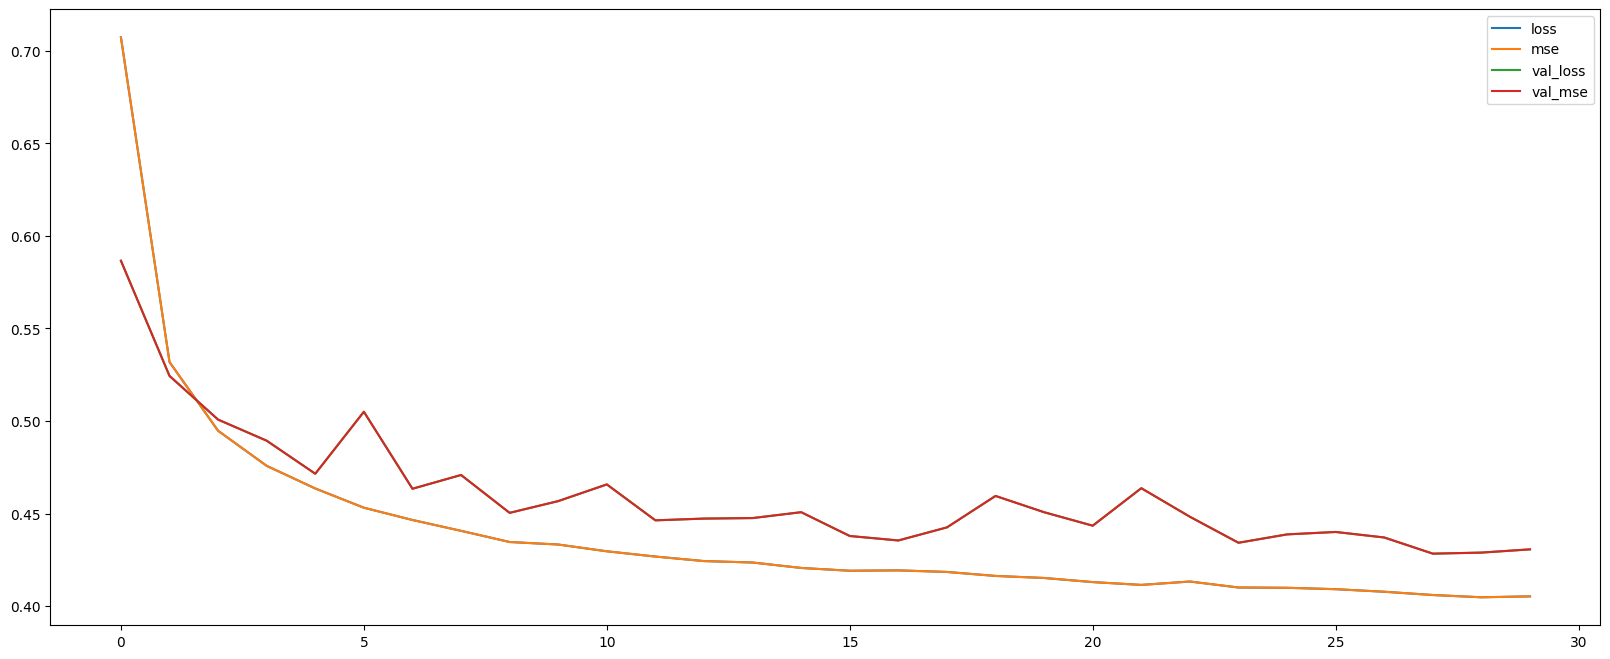

In [33]:
plt.figure(figsize=(20,8))
plt.plot(history_df)
plt.legend(['loss', 'mse', 'val_loss', 'val_mse'])
plt.show()

In [45]:
# Tensorboard

In [43]:
%reload_ext tensorboard

In [44]:
%tensorboard --logdir="logs"

In [34]:
# Evaluate the Model
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 993us/step - loss: 0.4187 - mse: 0.4187


[0.41874051094055176, 0.41874051094055176]

In [35]:
X_test.shape

(4128, 6)

In [36]:
# Predict the Model
X_act = X_test[0]
y_act = y_test.iloc[1]

In [37]:
X_act

array([-1.15763869, -0.28336379, -0.57962896, -0.18908216, -0.03070471,
        0.12364657])

In [39]:
X_act.reshape(1,6)

array([[-1.15763869, -0.28336379, -0.57962896, -0.18908216, -0.03070471,
         0.12364657]])

In [40]:
y_act

MedHouseVal    0.458
Name: 3024, dtype: float64

In [41]:
y_pred = model.predict(X_act.reshape(1,6))

1/1 [==============================] - 0s 54ms/step


In [42]:
y_pred

array([[0.8774187]], dtype=float32)